In [1]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import sys
#import pickle
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import logsumexp, betaln, gammaln
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
#!pip install pandas matplotlib seaborn
#!pip install astropy matplotlib seaborn

import seaborn as sns



#from functions import Model_1_plot, Model_2_plot

np.set_printoptions(threshold=sys.maxsize)
matplotlib.rc('font', size=14)
matplotlib.rc('font', family='DejaVu Sans')

data_directory = '/content/drive/MyDrive/Colab Notebooks/'
data_filename = data_directory + 'NSA_v1_0_1_VAGC_vflag-V2-VF_updated.fits'

hdu = fits.open(data_filename)
data = Table(hdu[1].data)
print(len(data))
hdu.close()

641409


In [2]:
catalog_SDSS = data[data['IN_DR7_LSS'] == 1]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250,
                                       catalog_north['RA'] < 269,
                                       catalog_north['DEC'] > 51,
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]      #exclude rows where strip_boolean is True
del catalog_north


Mstar_NSA = np.log10(catalog_main['ELPETRO_MASS'])
gr_NSA = np.array(catalog_main['g_r'])
ur_NSA = np.array(catalog_main['u_r'])
rabsmag_NSA = np.array(catalog_main['ELPETRO_ABSMAG'][:,4])
SFR = np.array(catalog_main['SFR'])
sSFR = np.array(catalog_main['sSFR'])

#print(Mstar_NSA)

<ipython-input-2-42123c7a5c0f>:14: RuntimeWarning: divide by zero encountered in log10
  Mstar_NSA = np.log10(catalog_main['ELPETRO_MASS'])


In [3]:
wall_v2 = catalog_main['vflag_V2'] == 0
void_v2 = catalog_main['vflag_V2'] == 1
edge_v2 = catalog_main['vflag_V2'] == 2
out_v2 = catalog_main['vflag_V2'] == 9

wall_vf = catalog_main['vflag_VF'] == 0
void_vf = catalog_main['vflag_VF'] == 1
edge_vf = catalog_main['vflag_VF'] == 2
out_vf = catalog_main['vflag_VF'] == 9
del catalog_main, data        #delete

In [6]:
#Stellar mass
clean_wall_vf = Mstar_NSA[wall_vf][~np.isnan(Mstar_NSA[wall_vf]) & ~np.isinf(Mstar_NSA[wall_vf])]
clean_void_vf = Mstar_NSA[void_vf][~np.isnan(Mstar_NSA[void_vf]) & ~np.isinf(Mstar_NSA[void_vf])]

clean_wall_v2 = Mstar_NSA[wall_v2][~np.isnan(Mstar_NSA[wall_v2]) & ~np.isinf(Mstar_NSA[wall_v2])]
clean_void_v2 = Mstar_NSA[void_v2][~np.isnan(Mstar_NSA[void_v2]) & ~np.isinf(Mstar_NSA[void_v2])]

print('The max value is: ', max(clean_wall_vf), '.   The min value is: ', min(clean_wall_vf), '.  The length is: ', len(clean_wall_vf), np.mean(clean_wall_vf), np.std(clean_wall_vf))
print('The max value is: ', max(clean_void_vf), '.   The min value is: ', min(clean_void_vf), '.  The length is: ', len(clean_void_vf), np.mean(clean_void_vf), np.std(clean_void_vf))

print('The max value is: ', max(clean_wall_v2), '.   The min value is: ', min(clean_wall_v2), '.  The length is: ', len(clean_wall_v2), np.mean(clean_wall_v2), np.std(clean_wall_v2))
print('The max value is: ', max(clean_void_v2), '.   The min value is: ', min(clean_void_v2), '.  The length is: ', len(clean_void_v2), np.mean(clean_void_v2), np.std(clean_void_v2))

#g-r
cleangr_wall_vf = gr_NSA[wall_vf][~np.isnan(gr_NSA[wall_vf]) & ~np.isinf(gr_NSA[wall_vf])]
cleangr_void_vf = gr_NSA[void_vf][~np.isnan(gr_NSA[void_vf]) & ~np.isinf(gr_NSA[void_vf])]

cleangr_wall_v2 = gr_NSA[wall_v2][~np.isnan(gr_NSA[wall_v2]) & ~np.isinf(gr_NSA[wall_v2])]
cleangr_void_v2 = gr_NSA[void_v2][~np.isnan(gr_NSA[void_v2]) & ~np.isinf(gr_NSA[void_v2])]

#u-r
cleanur_wall_vf = ur_NSA[wall_vf][~np.isnan(ur_NSA[wall_vf]) & ~np.isinf(ur_NSA[wall_vf])]
cleanur_void_vf = ur_NSA[void_vf][~np.isnan(ur_NSA[void_vf]) & ~np.isinf(ur_NSA[void_vf])]

cleanur_wall_v2 = ur_NSA[wall_v2][~np.isnan(ur_NSA[wall_v2]) & ~np.isinf(ur_NSA[wall_v2])]
cleanur_void_v2 = ur_NSA[void_v2][~np.isnan(ur_NSA[void_v2]) & ~np.isinf(ur_NSA[void_v2])]

#Magnitude
cleanmag_wall_vf = rabsmag_NSA[wall_vf][~np.isnan(rabsmag_NSA[wall_vf]) & ~np.isinf(rabsmag_NSA[wall_vf])]
cleanmag_void_vf = rabsmag_NSA[void_vf][~np.isnan(rabsmag_NSA[void_vf]) & ~np.isinf(rabsmag_NSA[void_vf])]

cleanmag_wall_v2 = rabsmag_NSA[wall_v2][~np.isnan(rabsmag_NSA[wall_v2]) & ~np.isinf(rabsmag_NSA[wall_v2])]
cleanmag_void_v2 = rabsmag_NSA[void_v2][~np.isnan(rabsmag_NSA[void_v2]) & ~np.isinf(rabsmag_NSA[void_v2])]

#SFR
cleanSFR_wall_vf = SFR[wall_vf][~np.isnan(SFR[wall_vf]) & ~np.isinf(SFR[wall_vf])]
cleanSFR_void_vf = SFR[void_vf][~np.isnan(SFR[void_vf]) & ~np.isinf(SFR[void_vf])]

cleanSFR_wall_v2 = SFR[wall_v2][~np.isnan(SFR[wall_v2]) & ~np.isinf(SFR[wall_v2])]
cleanSFR_void_v2 = SFR[void_v2][~np.isnan(SFR[void_v2]) & ~np.isinf(SFR[void_v2])]

#sSFR
cleansSFR_wall_vf = sSFR[wall_vf][~np.isnan(sSFR[wall_vf]) & ~np.isinf(sSFR[wall_vf])]
cleansSFR_void_vf = sSFR[void_vf][~np.isnan(sSFR[void_vf]) & ~np.isinf(sSFR[void_vf])]

cleansSFR_wall_v2 = sSFR[wall_v2][~np.isnan(sSFR[wall_v2]) & ~np.isinf(sSFR[wall_v2])]
cleansSFR_void_v2 = sSFR[void_v2][~np.isnan(sSFR[void_v2]) & ~np.isinf(sSFR[void_v2])]

The max value is:  14.194422 .   The min value is:  3.2271805 .  The length is:  244533 9.991956 0.5480101
The max value is:  13.336809 .   The min value is:  2.1857977 .  The length is:  85803 9.786499 0.634429
The max value is:  14.194422 .   The min value is:  2.1857977 .  The length is:  102696 9.96497 0.59435534
The max value is:  13.632925 .   The min value is:  2.3037689 .  The length is:  247245 9.927355 0.5846638


In [8]:
def pt_d_sample_test(data1, data2, c=1, max_depth=-1, qdist=norm.ppf, aj=lambda depth: depth**2, log_BF=False):
    old_expressions = np.get_printoptions()['threshold']
    np.set_printoptions(threshold=max(max_depth, old_expressions))

    if max_depth < 0:
     # max_depth = max(1, int(np.floor(np.log2(len(data1))/2 )))
      max_depth = 8


    binary = np.concatenate((np.zeros(len(data1)), np.ones(len(data2))))
    continuous = np.concatenate((data1, data2))
    data = np.column_stack([scale(continuous), binary])
    X = data[:, 0]  # assign the scaled value to X

    p_H0 = pt_marginal_likelihood(X, low=0, up=1, c=c, depth=1, max_depth=max_depth, qdist=qdist, aj=aj)

    discrete_values = np.unique(binary)

    p_H1 = max([pt_marginal_likelihood(data[data[:, 1] == i, 0], low=0, up=1, c=c, depth=1, max_depth=max_depth, qdist=qdist, aj=aj) +
                pt_marginal_likelihood(data[data[:, 1] != i, 0], low=0, up=1, c=c, depth=1, max_depth=max_depth, qdist=qdist, aj=aj)
                for i in discrete_values])

    n_hypotheses = len(discrete_values)
    logbf = p_H0 - p_H1 #+ np.log(n_hypotheses)
    np.set_printoptions(threshold=old_expressions)

    if log_BF:
        return logbf
    else:
        bf = np.exp(logbf)
        return bf


def pt_marginal_likelihood(data, low, up, c, depth, max_depth, qdist, aj):
    if depth == max_depth:
        return 0

    if isinstance(low, (int, float)):  # if low is an integer
        n_j = [
            np.sum((qdist(low) < data) & (data <= qdist((low + up) / 2))),
            np.sum((qdist((low + up) / 2) < data) & (data <= qdist(up)))
        ]  # counts the number of data in each interval (2 vector).
    else:
        n_j = [
            np.sum((qdist(low[0]) < data[:, 0]) & (data[:, 0] <= qdist((low[0] + up[0]) / 2)) &
                   (qdist(low[1]) < data[:, 1]) & (data[:, 1] <= qdist((low[1] + up[1]) / 2))),
            np.sum((qdist((low[0] + up[0]) / 2) < data[:, 0]) & (data[:, 0] <= qdist(up[0])) &
                   (qdist(low[1]) < data[:, 1]) & (data[:, 1] <= qdist((low[1] + up[1]) / 2))),
            np.sum((qdist(low[0]) < data[:, 0]) & (data[:, 0] <= qdist((low[0] + up[0]) / 2)) &
                   (qdist((low[1] + up[1]) / 2) < data[:, 1]) & (data[:, 1] <= qdist(up[1]))),
            np.sum((qdist((low[0] + up[0]) / 2) < data[:, 0]) & (data[:, 0] <= qdist(up[0])) &
                   (qdist((low[1] + up[1]) / 2) < data[:, 1]) & (data[:, 1] <= qdist(up[1])))
        ]  # 4 vector

    if np.sum(n_j) == 0:
        return 0

    a_j = c * aj(depth)

    if len(n_j) == 2:
        logl = betaln(n_j[0] + a_j, n_j[1] + a_j) - betaln(a_j, a_j)  # log of beta function
    else:
        logl = lmbeta(n_j[0] + a_j, n_j[1] + a_j, n_j[2] + a_j, n_j[3] + a_j) - lmbeta(a_j, a_j, a_j, a_j)

    if isinstance(low, (int, float)):
        likelihoods = [
            pt_marginal_likelihood(data, low, (low + up) / 2, c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, (low + up) / 2, up, c, depth + 1, max_depth, qdist, aj)
        ]  # likelihood of subpartitions
    else:
        likelihoods = [
            pt_marginal_likelihood(data, low, (low + up) / 2, c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, (low + up) / 2, up, c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, [low[0], (low[1] + up[1]) / 2], [(low[0] + up[0]) / 2, up[1]],
                                   c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, [(low[0] + up[0]) / 2, low[1]], [up[0], (low[1] + up[1]) / 2],
                                   c, depth + 1, max_depth, qdist, aj)
        ]

    return logl + np.sum(likelihoods)


def lmbeta(*args):
    return np.sum(gammaln(args)) - gammaln(np.sum(args))


def is_discrete(X):
    return np.all(np.isin(X, np.arange(11)))  # evaluates to TRUE only if every element of X lies within the specified range of 0 to 10.



def scale(data):
    return (data - np.mean(data)) / np.std(data)      #standardize



max(1, int(np.floor(np.log2(244533) / 2)))

8

In [14]:
#Bayes factor when c = 1, depth = 8 and compare with parametric BF

print(len(clean_wall_v2), len(clean_wall_vf),
      len(cleangr_wall_v2), len(cleangr_wall_vf),
      len(cleanur_wall_v2), len(cleanur_wall_vf),
      len(cleanmag_wall_v2), len(cleanmag_wall_vf),
      len(cleanSFR_wall_v2), len(cleanSFR_wall_vf),
      len(cleansSFR_wall_v2), len(cleansSFR_wall_vf))
max(1, int(np.floor(np.log2(len(clean_wall_vf)) / 2)))

log_bf_v2 = pt_d_sample_test(clean_wall_v2,clean_void_v2,log_BF=True)
log_bf_vf = pt_d_sample_test(clean_wall_vf,clean_void_vf,log_BF=True)
print("Stellar Mass: Log Bayes Factor for v2 is:", log_bf_v2, ".  Log Bayes Factor for vf is:", log_bf_vf)

loggr_bf_v2 = pt_d_sample_test(cleangr_wall_v2,cleangr_void_v2,log_BF=True)
loggr_bf_vf = pt_d_sample_test(cleangr_wall_vf,cleangr_void_vf,log_BF=True)
print("g-r: Log Bayes Factor for v2 is:", loggr_bf_v2, ".  Log Bayes Factor for vf is:", loggr_bf_vf)

logur_bf_v2 = pt_d_sample_test(cleanur_wall_v2,cleanur_void_v2,log_BF=True)
logur_bf_vf = pt_d_sample_test(cleanur_wall_vf,cleanur_void_vf,log_BF=True)
print("u-r: Log Bayes Factor for v2 is:", logur_bf_v2, ".  Log Bayes Factor for vf is:", logur_bf_vf)

logmag_bf_v2 = pt_d_sample_test(cleanmag_wall_v2,cleanmag_void_v2,log_BF=True)
logmag_bf_vf = pt_d_sample_test(cleanmag_wall_vf,cleanmag_void_vf,log_BF=True)
print("Magnitude: Log Bayes Factor for v2 is:", logmag_bf_v2, ".  Log Bayes Factor for vf is:", logmag_bf_vf)

logSFR_bf_v2 = pt_d_sample_test(cleanSFR_wall_v2,cleanSFR_void_v2,log_BF=True)
logSFR_bf_vf = pt_d_sample_test(cleanSFR_wall_vf,cleanSFR_void_vf,log_BF=True)
print("SFR: Log Bayes Factor for v2 is:", logSFR_bf_v2, ".  Log Bayes Factor for vf is:", logSFR_bf_vf)

logsSFR_bf_v2 = pt_d_sample_test(cleansSFR_wall_v2,cleansSFR_void_v2,log_BF=True)
logsSFR_bf_vf = pt_d_sample_test(cleansSFR_wall_vf,cleansSFR_void_vf,log_BF=True)
print("sSFR: Log Bayes Factor for v2 is:", logsSFR_bf_v2, ".  Log Bayes Factor for vf is:", logsSFR_bf_vf)

data = {
    "Stellar Mass": [log_bf_v2, log_bf_vf],
    "g-r": [loggr_bf_v2, loggr_bf_vf],
    "u-r": [logur_bf_v2, logur_bf_vf],
    "Magnitude": [logmag_bf_v2, logmag_bf_vf],
    "SFR": [logSFR_bf_v2, logSFR_bf_vf],
    "sSFR": [logsSFR_bf_v2, logsSFR_bf_vf]
}

df = pd.DataFrame(data, index=["V2", "VF"])
print('Nonparametric BF:')
print('  ')
print(df)

log_bf_v2_para = -203
log_bf_vf_para = -1708
loggr_bf_v2_para = -57.9
loggr_bf_vf_para = -1704
logur_bf_v2_para = -28.8
logur_bf_vf_para = -1592
logmag_bf_v2_para = -308
logmag_bf_vf_para = -1248
logSFR_bf_v2_para = -66.5
logSFR_bf_vf_para = -416
logsSFR_bf_v2_para = -18.9
logsSFR_bf_vf_para = -1471

data2 = {
    "Stellar Mass": [log_bf_v2_para, log_bf_vf_para],
    "g-r": [loggr_bf_v2_para, loggr_bf_vf_para],
    "u-r": [logur_bf_v2_para, logur_bf_vf_para],
    "Magnitude": [logmag_bf_v2_para, logmag_bf_vf_para],
    "SFR": [logSFR_bf_v2_para, logSFR_bf_vf_para],
    "sSFR": [logsSFR_bf_v2_para, logsSFR_bf_vf_para]
}

df2 = pd.DataFrame(data2, index=["V2", "VF"])

print('  ')
print('Parametric BF:')
print('  ')
print(df2)

102696 244533 102696 244533 102696 244533 102696 244533 92399 223686 92399 223686
Stellar Mass: Log Bayes Factor for v2 is: -280.3904175614007 .  Log Bayes Factor for vf is: -3896.3990093751345
g-r: Log Bayes Factor for v2 is: 123.54304059641436 .  Log Bayes Factor for vf is: -3847.901924022706
u-r: Log Bayes Factor for v2 is: 80.0587350986898 .  Log Bayes Factor for vf is: -3608.749409329612
Magnitude: Log Bayes Factor for v2 is: -547.2785871550441 .  Log Bayes Factor for vf is: -2901.5928678745404
SFR: Log Bayes Factor for v2 is: -58.07438434683718 .  Log Bayes Factor for vf is: -895.3444242298137
sSFR: Log Bayes Factor for v2 is: 161.60844380734488 .  Log Bayes Factor for vf is: -3247.8177740008105
Nonparametric BF:
  
    Stellar Mass          g-r          u-r    Magnitude         SFR  \
V2   -280.390418   123.543041    80.058735  -547.278587  -58.074384   
VF  -3896.399009 -3847.901924 -3608.749409 -2901.592868 -895.344424   

           sSFR  
V2   161.608444  
VF -3247.817774  


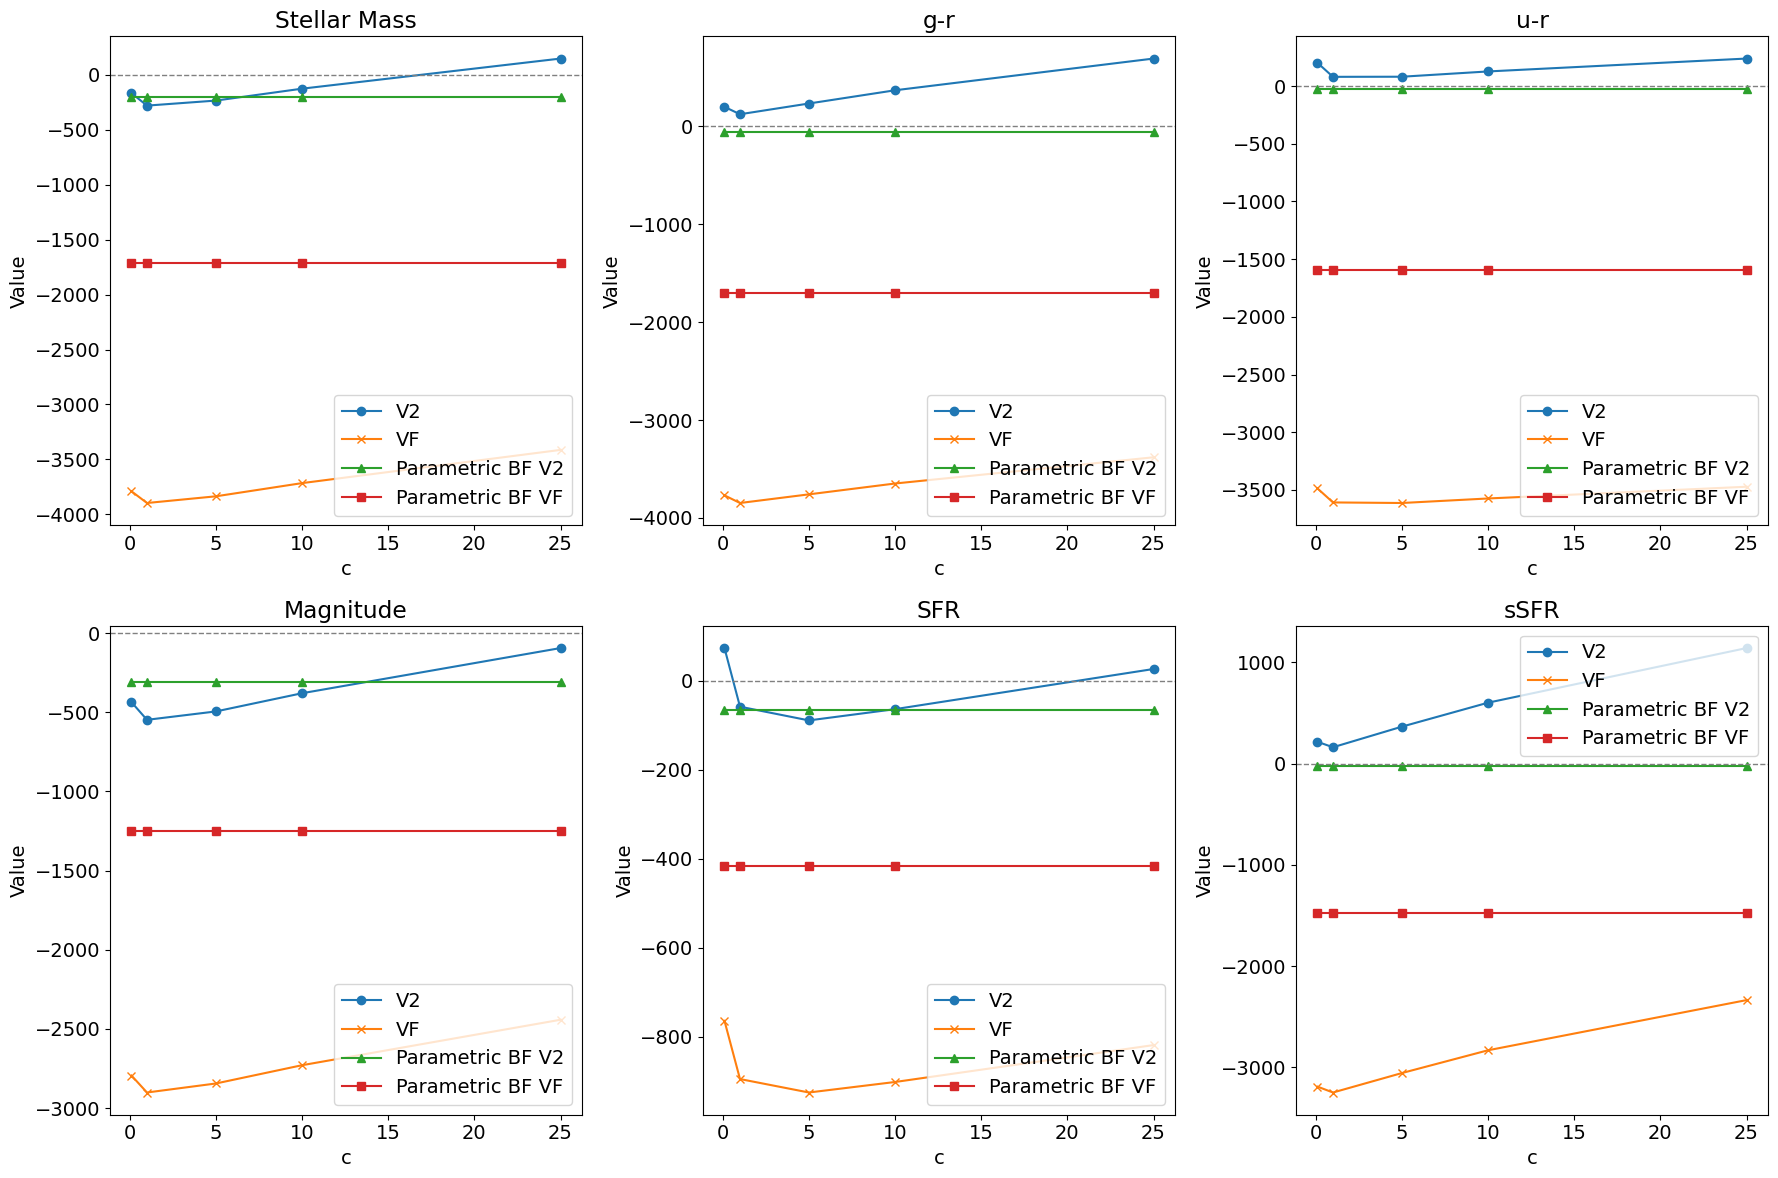

In [24]:
#effect of the free parameter c when depth = 8

data = {
    'c': [0.1, 1, 5, 10, 25],
    'Stellar Mass V2': [-167.047300, -280.390418, -234.529197, -126.257643, 147.791710],
    'Stellar Mass VF': [-3789.846902, -3896.390909, -3835.470061, -3715.424196, -3413.234362],
    'g-r V2': [199.168347, 123.543041, 233.319545, 368.475718, 692.486761],
    'g-r VF': [-3769.896191, -3847.901924, -3759.519767, -3648.694874, -3380.967974],
    'u-r V2': [201.182014, 80.058735, 81.003077, 126.768153, 238.463495],
    'u-r VF': [-3487.389088, -3608.749409, -3613.655855, -3574.393315, -3472.717833],
    'Magnitude V2': [-435.842869, -547.278587, -494.261028, -379.220123, -93.862501],
    'Magnitude VF': [-2794.444055, -2901.592868, -2844.634074, -2729.160348, -2441.983374],
    'SFR V2': [73.749115, -58.074384, -88.932504, -63.631139, 26.655926],
    'SFR VF': [-764.391443, -895.344424, -925.588242, -901.954442, -818.992038],
    'sSFR V2': [215.422553, 161.608444, 365.085537, 601.817715, 1141.203423],
    'sSFR VF': [-3189.737428, -3247.817774, -3055.757313, -2830.749988, -2335.369629],
    'Stellar Mass Parametric BF V2': [-203, -203, -203, -203, -203],
    'Stellar Mass Parametric BF VF': [-1708, -1708, -1708, -1708, -1708],
    'g-r Parametric BF V2': [-57.9, -57.9, -57.9, -57.9, -57.9],
    'g-r Parametric BF VF': [-1704, -1704, -1704, -1704, -1704],
    'u-r Parametric BF V2': [-28.8, -28.8, -28.8, -28.8, -28.8],
    'u-r Parametric BF VF': [-1592, -1592, -1592, -1592, -1592],
    'Magnitude Parametric BF V2': [-308, -308, -308, -308, -308],
    'Magnitude Parametric BF VF': [-1248, -1248, -1248, -1248, -1248],
    'SFR Parametric BF V2': [-66.5, -66.5, -66.5, -66.5, -66.5],
    'SFR Parametric BF VF': [-416, -416, -416, -416, -416],
    'sSFR Parametric BF V2': [-18.9, -18.9, -18.9, -18.9, -18.9],
    'sSFR Parametric BF VF': [-1471, -1471, -1471, -1471, -1471]
}

df = pd.DataFrame(data)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

titles = ['Stellar Mass', 'g-r', 'u-r', 'Magnitude', 'SFR', 'sSFR']

for i, (title, ax) in enumerate(zip(titles, axes.flatten())):
    ax.plot(df['c'], df[f'{title} V2'], label='V2', marker='o')
    ax.plot(df['c'], df[f'{title} VF'], label='VF', marker='x')
    ax.plot(df['c'], df[f'{title} Parametric BF V2'], label='Parametric BF V2', marker='^')
    ax.plot(df['c'], df[f'{title} Parametric BF VF'], label='Parametric BF VF', marker='s')
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(title)
    ax.set_xlabel('c')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()


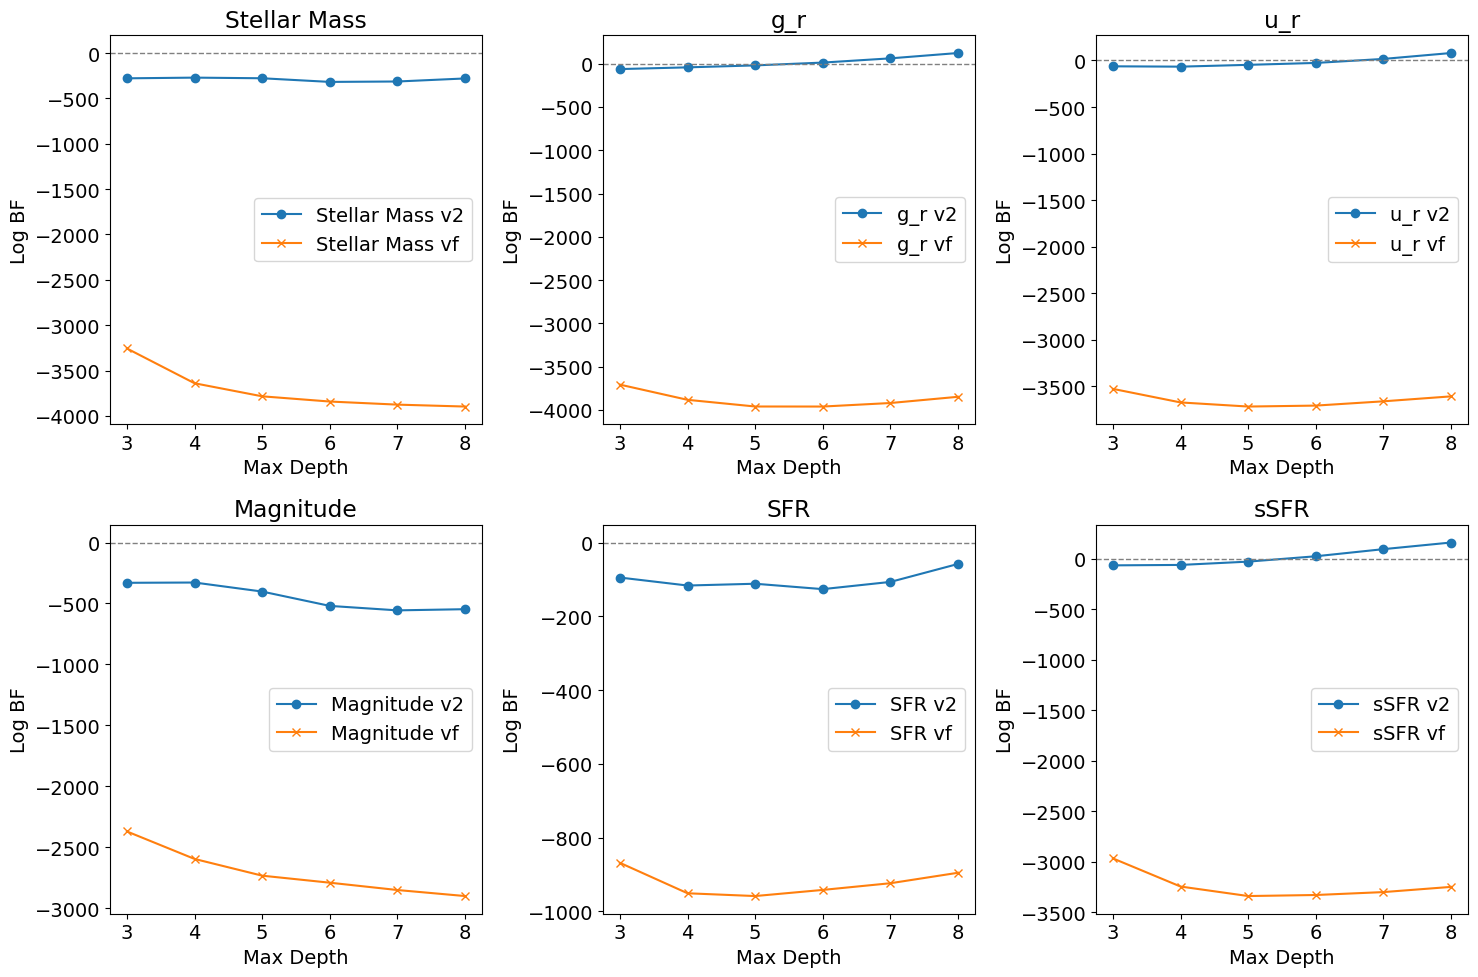

In [22]:
#effect of depth when we keep c = 1

def generate_plot(ax, clean_wall_v2, clean_void_v2, clean_wall_vf, clean_void_vf, title):
    max_depth_values = [3, 4, 5, 6, 7, 8]
    results_v2 = []
    results_vf = []

    for depth in max_depth_values:
        result_v2 = pt_d_sample_test(clean_wall_v2, clean_void_v2, c = 1, max_depth=depth, log_BF=True)
        result_vf = pt_d_sample_test(clean_wall_vf, clean_void_vf, c = 1, max_depth=depth, log_BF=True)
        results_v2.append(result_v2)
        results_vf.append(result_vf)

    ax.plot(max_depth_values, results_v2, label=f'{title} v2', marker='o')
    ax.plot(max_depth_values, results_vf, label=f'{title} vf', marker='x')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Log BF')
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(title)
    ax.legend()

# Example usage:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

generate_plot(axs[0, 0], clean_wall_v2, clean_void_v2, clean_wall_vf, clean_void_vf, 'Stellar Mass')
generate_plot(axs[0, 1], cleangr_wall_v2, cleangr_void_v2, cleangr_wall_vf, cleangr_void_vf, 'g_r')
generate_plot(axs[0, 2], cleanur_wall_v2, cleanur_void_v2, cleanur_wall_vf, cleanur_void_vf, 'u_r')
generate_plot(axs[1, 0], cleanmag_wall_v2, cleanmag_void_v2, cleanmag_wall_vf, cleanmag_void_vf, 'Magnitude')
generate_plot(axs[1, 1], cleanSFR_wall_v2, cleanSFR_void_v2, cleanSFR_wall_vf, cleanSFR_void_vf, 'SFR')
generate_plot(axs[1, 2], cleansSFR_wall_v2, cleansSFR_void_v2, cleansSFR_wall_vf, cleansSFR_void_vf, 'sSFR')

plt.tight_layout()
plt.show()


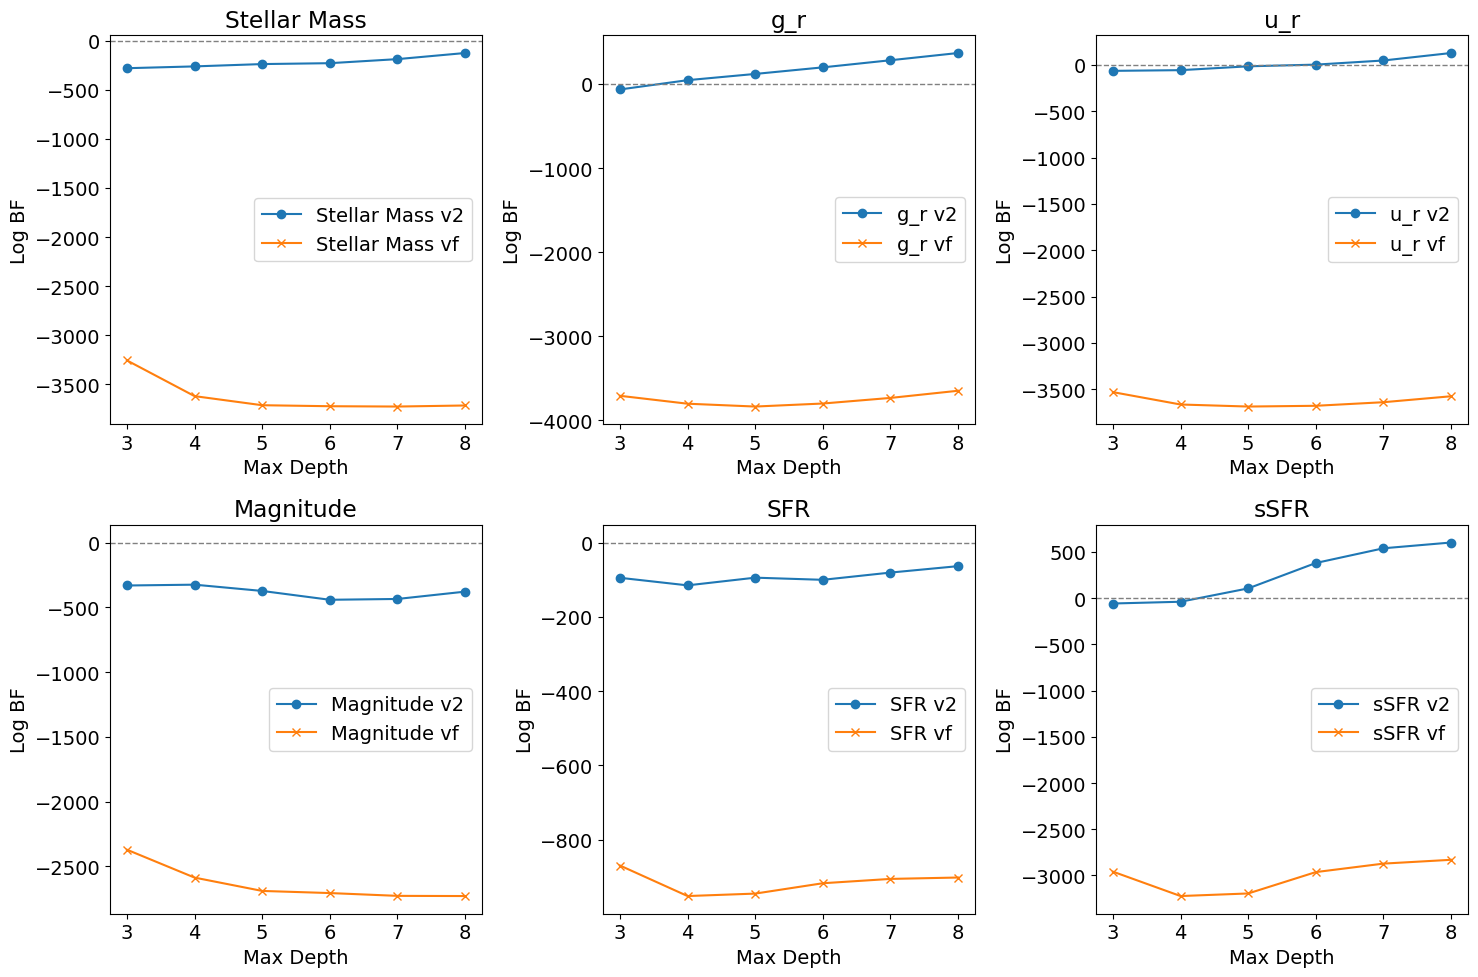

In [23]:
#effect of depth when we keep c = 10

def generate_plot(ax, clean_wall_v2, clean_void_v2, clean_wall_vf, clean_void_vf, title):
    max_depth_values = [3, 4, 5, 6, 7, 8]
    results_v2 = []
    results_vf = []

    for depth in max_depth_values:
        result_v2 = pt_d_sample_test(clean_wall_v2, clean_void_v2, c = 10, max_depth=depth, log_BF=True)
        result_vf = pt_d_sample_test(clean_wall_vf, clean_void_vf, c = 10, max_depth=depth, log_BF=True)
        results_v2.append(result_v2)
        results_vf.append(result_vf)

    ax.plot(max_depth_values, results_v2, label=f'{title} v2', marker='o')
    ax.plot(max_depth_values, results_vf, label=f'{title} vf', marker='x')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Log BF')
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(title)
    ax.legend()

# Example usage:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

generate_plot(axs[0, 0], clean_wall_v2, clean_void_v2, clean_wall_vf, clean_void_vf, 'Stellar Mass')
generate_plot(axs[0, 1], cleangr_wall_v2, cleangr_void_v2, cleangr_wall_vf, cleangr_void_vf, 'g_r')
generate_plot(axs[0, 2], cleanur_wall_v2, cleanur_void_v2, cleanur_wall_vf, cleanur_void_vf, 'u_r')
generate_plot(axs[1, 0], cleanmag_wall_v2, cleanmag_void_v2, cleanmag_wall_vf, cleanmag_void_vf, 'Magnitude')
generate_plot(axs[1, 1], cleanSFR_wall_v2, cleanSFR_void_v2, cleanSFR_wall_vf, cleanSFR_void_vf, 'SFR')
generate_plot(axs[1, 2], cleansSFR_wall_v2, cleansSFR_void_v2, cleansSFR_wall_vf, cleansSFR_void_vf, 'sSFR')

plt.tight_layout()
plt.show()
